<a href="https://colab.research.google.com/github/Varkenes/Tensorflow-Keras-Niebla/blob/main/80Train_20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


# **Lectura de datos:**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/80%20entrenamiento%20niebla.csv')

In [ ]:
print(df)

       N     T (°C)     HR (%)  ...        Vy  Nubosidad(%)  Flujo (L/día)
0     12  17.470833  49.156250  ...  0.086527             6            0.0
1      6  18.611458  50.416667  ... -0.087348             7            0.0
2     36  12.633333  74.333333  ...  0.061945            99            0.0
3    148   9.995238  78.976190  ...  0.011856             6            0.0
4    181  12.193939  88.606061  ...  0.160884           100            0.0
..   ...        ...        ...  ...       ...           ...            ...
164  130  11.932558  64.279070  ...  0.005958            67            0.0
165  136   9.588372  69.348837  ...  0.191628             9            0.0
166   43  15.182292  79.937500  ... -0.147210           100            0.0
167   23  17.211458  56.010417  ... -0.198459             8            0.0
168   67   9.961702  56.063830  ...  0.019408             5            0.0

[169 rows x 9 columns]


In [ ]:
dataset = df.values

In [ ]:
print(dataset)

[[ 1.20000000e+01  1.74708333e+01  4.91562500e+01 ...  8.65271980e-02
   6.00000000e+00  0.00000000e+00]
 [ 6.00000000e+00  1.86114583e+01  5.04166667e+01 ... -8.73477370e-02
   7.00000000e+00  0.00000000e+00]
 [ 3.60000000e+01  1.26333333e+01  7.43333333e+01 ...  6.19447680e-02
   9.90000000e+01  0.00000000e+00]
 ...
 [ 4.30000000e+01  1.51822917e+01  7.99375000e+01 ... -1.47209670e-01
   1.00000000e+02  0.00000000e+00]
 [ 2.30000000e+01  1.72114583e+01  5.60104167e+01 ... -1.98458847e-01
   8.00000000e+00  0.00000000e+00]
 [ 6.70000000e+01  9.96170213e+00  5.60638298e+01 ...  1.94083870e-02
   5.00000000e+00  0.00000000e+00]]


# **Definiendo Variables**
Acá se mejoró esta línea de código separando los las variables input y output de prueba (x_train e y_train) y las variables input y output (x_test e y_test), 70 y 30 % respectivamete de manera aleatoria.

In [ ]:
X=dataset[0:,1:8]
Y=dataset[:,8]

In [ ]:
print(X)
entrenamientodedatos = X
np.savetxt("entrenamientodedatos80_20.csv", entrenamientodedatos, delimiter=",")

[[ 1.74708333e+01  4.91562500e+01  1.01184375e+03 ... -5.85290697e-01
   8.65271980e-02  6.00000000e+00]
 [ 1.86114583e+01  5.04166667e+01  1.01187500e+03 ... -6.10434067e-01
  -8.73477370e-02  7.00000000e+00]
 [ 1.26333333e+01  7.43333333e+01  1.01415208e+03 ... -1.95765553e-01
   6.19447680e-02  9.90000000e+01]
 ...
 [ 1.51822917e+01  7.99375000e+01  1.01789792e+03 ... -5.49702733e-01
  -1.47209670e-01  1.00000000e+02]
 [ 1.72114583e+01  5.60104167e+01  1.01447292e+03 ... -5.29028019e-01
  -1.98458847e-01  8.00000000e+00]
 [ 9.96170213e+00  5.60638298e+01  1.01242083e+03 ... -2.08430983e-01
   1.94083870e-02  5.00000000e+00]]


In [ ]:
print(Y)
testeodedatos = Y
np.savetxt("testdedatos80_20.csv", testeodedatos, delimiter=",")

[0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.74 0.   0.02 0.   0.33
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.   2.81 0.22
 0.   0.   1.91 0.12 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   1.97 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.18 0.   0.   0.04
 2.49 0.19 0.01 0.   0.   1.55 0.   0.   0.   0.   0.01 0.   0.01 0.
 0.   0.   0.   0.37 0.   0.08 0.   0.1  0.   0.   0.   0.   0.   0.
 0.   0.14 0.   0.   0.   0.   0.   0.   0.08 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.15 0.   0.   0.24 0.04 0.   0.
 0.   0.01 0.   0.   0.   0.   0.   1.55 0.14 0.01 0.   0.   0.17 0.
 0.   0.   0.06 0.   0.   0.14 0.   0.   0.01 0.   0.   0.   0.   0.02
 0.   0.   0.69 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.  ]


# **El modelo**
## Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo secuencial con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Los pasos de construcción del modelo se envuelven en una función, build_model, ya que crearemos un segundo modelo, más adelante.

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[7]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.fit(X,Y,epochs=10,verbose=2)

Epoch 1/10
6/6 - 0s - loss: 0.0664 - mae: 0.1117 - mse: 0.0664
Epoch 2/10
6/6 - 0s - loss: 0.0814 - mae: 0.1332 - mse: 0.0814
Epoch 3/10
6/6 - 0s - loss: 0.0774 - mae: 0.1113 - mse: 0.0774
Epoch 4/10
6/6 - 0s - loss: 0.0708 - mae: 0.1056 - mse: 0.0708
Epoch 5/10
6/6 - 0s - loss: 0.0664 - mae: 0.1032 - mse: 0.0664
Epoch 6/10
6/6 - 0s - loss: 0.0624 - mae: 0.1084 - mse: 0.0624
Epoch 7/10
6/6 - 0s - loss: 0.0825 - mae: 0.1215 - mse: 0.0825
Epoch 8/10
6/6 - 0s - loss: 0.0722 - mae: 0.1029 - mse: 0.0722
Epoch 9/10
6/6 - 0s - loss: 0.0623 - mae: 0.0961 - mse: 0.0623
Epoch 10/10
6/6 - 0s - loss: 0.0655 - mae: 0.0962 - mse: 0.0655


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-1j1lgfrt
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-1j1lgfrt
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c60db3aa06bcd8030c684949373997ef2f03cdf8_-py3-none-any.whl size=154243 sha256=4b065080103ed9e992f76b915d100067cc255f07cea5abc3dc55b6f1c90bc4ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-3f33z7bd/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Failed to build tensorflow-docs
    Running setup.py install for tensorflow-docs ... done
  DEPRECATION: tensorflow-docs was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling 

In [ ]:
EPOCHS = 15000

history = model.fit(X,Y,
  epochs=EPOCHS, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0632,  mae:0.1044,  mse:0.0632,  
....................................................................................................
Epoch: 100, loss:0.0844,  mae:0.1274,  mse:0.0844,  
....................................................................................................
Epoch: 200, loss:0.0591,  mae:0.0967,  mse:0.0591,  
....................................................................................................
Epoch: 300, loss:0.0678,  mae:0.1096,  mse:0.0678,  
....................................................................................................
Epoch: 400, loss:0.0640,  mae:0.1092,  mse:0.0640,  
....................................................................................................
Epoch: 500, loss:0.0631,  mae:0.0955,  mse:0.0631,  
....................................................................................................
Epoch: 600, loss:0.0676,  mae:0.1070,  mse:0.0676,  
........................

## **Gráfica Valores Reales V/s Predicción**

0.6387529521497688

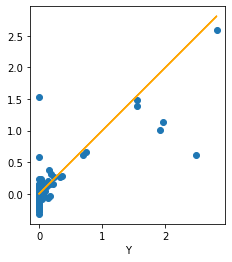

In [ ]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Y, test_predictions)
plt.xlabel('X')
plt.xlabel('Y')
_=plt.plot(Y,Y,color = 'orange')
r2_score(Y, test_predictions)


In [ ]:
prediction = model.predict(X)

print(prediction)

np.savetxt("predict80.csv", prediction, delimiter=",")

[[-2.81053782e-02]
 [-5.22364974e-02]
 [-4.65347767e-02]
 [ 8.35559964e-02]
 [ 6.23271465e-02]
 [-1.06677830e-01]
 [ 5.80627918e-02]
 [-1.90024376e-02]
 [ 1.10768795e-01]
 [ 6.65868759e-01]
 [-4.00034785e-02]
 [ 1.44576073e-01]
 [-2.66936421e-01]
 [ 2.66417980e-01]
 [-2.87227631e-02]
 [ 5.42292595e-02]
 [-9.46990848e-02]
 [ 9.33755636e-02]
 [-9.92038250e-02]
 [-3.42043638e-02]
 [-2.34309077e-01]
 [-4.09854054e-02]
 [-2.52723694e-04]
 [ 2.37196565e-01]
 [-5.13169169e-02]
 [-9.21090841e-02]
 [ 2.59943914e+00]
 [ 1.61713481e-01]
 [-2.57508755e-02]
 [-1.31832182e-01]
 [ 1.01146197e+00]
 [ 1.30059838e-01]
 [ 9.49574709e-02]
 [-1.43288851e-01]
 [ 2.25945711e-02]
 [ 1.44422650e-01]
 [-9.29883122e-02]
 [-1.56239748e-01]
 [-3.50649357e-02]
 [-2.14825988e-01]
 [ 8.34119320e-02]
 [ 7.55997896e-02]
 [ 5.77894628e-01]
 [-1.27148986e-01]
 [ 6.39817119e-02]
 [ 1.12930024e+00]
 [ 2.95797586e-02]
 [ 7.43210316e-04]
 [-2.03360558e-01]
 [ 7.86811113e-02]
 [-2.29999721e-01]
 [-1.06729984e-01]
 [ 1.7573833

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Varkenes/Tensorflow-Keras-Niebla/main/20%20testeo%20niebla.csv')

In [ ]:
dataset2 = df2.values

In [ ]:
Xtest=dataset2[0:,1:8]
Ytest=dataset2[:,8]

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
model.save('my_model')

# load the pb model
model_tf = load_model('my_model')

# predict
pred_tf = model_tf.predict(Xtest)

score_tf = np.sqrt(mean_squared_error(pred_tf,Ytest))
print("After loading score (RMSE): {}".format(score_tf))

INFO:tensorflow:Assets written to: my_model/assets
After loading score (RMSE): 0.5932174099507069


-0.2557348699686002

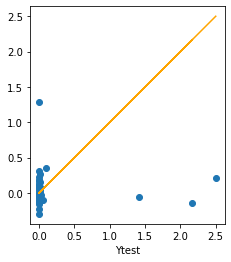

In [ ]:

test_predictions2 = model.predict(Xtest).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(Ytest, test_predictions2)
plt.xlabel('Xtest')
plt.xlabel('Ytest')
_=plt.plot(Ytest,Ytest,color = 'orange')
r2_score(Ytest, test_predictions2)

In [ ]:
predict= model.predict(Xtest)

print(predict)

np.savetxt("predict20.csv", predict, delimiter=",")

[[ 0.20598567]
 [-0.05382895]
 [ 0.13263965]
 [ 0.18420601]
 [ 0.0017947 ]
 [-0.1439873 ]
 [-0.29650998]
 [-0.02823108]
 [-0.03077137]
 [ 0.03195453]
 [ 0.15248334]
 [ 1.2831831 ]
 [ 0.26321584]
 [-0.01602173]
 [-0.13189316]
 [-0.02360463]
 [-0.06635183]
 [-0.22127551]
 [-0.00311399]
 [-0.1059249 ]
 [-0.00923789]
 [-0.00354147]
 [ 0.11280388]
 [ 0.05271947]
 [-0.04098868]
 [-0.03455645]
 [-0.1063379 ]
 [ 0.07652563]
 [-0.02573389]
 [ 0.17616665]
 [ 0.0870747 ]
 [ 0.34860536]
 [ 0.21915466]
 [-0.12739712]
 [ 0.31178448]
 [-0.16315866]
 [-0.00325716]
 [ 0.03758168]
 [-0.06419504]
 [ 0.07622093]
 [-0.01445317]
 [-0.00750184]
 [ 0.06581062]]
